# Assignment 2 - Frøydis Jørgensen - 245812

## Task 1

In this task I will convert this equation:

$$
m
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=\
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$

into a first-order form which will describe the time evolution of the location and velocity of the smaller body, {$x, y, v_x, v_y$}, so that we can solve it by using Runge-Kutta algorithms.

To get it to first form I define:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
$$

So that:
$$
\frac{d}{dt}
\left(
\begin{array}{c}
v_x \\ v_y
\end{array}
\right)
=
\frac{d^{2}}{dt^{2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
= 
- \frac{GmM}{(x^{2} + y^{2})^{3/2}}
\left(
\begin{array}{c}
x \\ y
\end{array}
\right)
$$


So we can describe the time evolution of the location x and y and the velocity $v_x$ and $v_y$ of the smaller body with:

$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y \\ v_x \\ v_y
\end{array}
\right)
=
\left(
\begin{array}{c}
v_x \\ v_y \\ - \frac{GmMx}{(x^{2} + y^{2})^{3/2}} \\ - \frac{GmMy}{(x^{2} + y^{2})^{3/2}}
\end{array}
\right)
$$

Now we have the equation on first-order form.

We know that the derivative of position ($x, y$) with time is velocity, and the derivative of velocity with time ($v_x, v_y$) is acceleration.

### Imports
I have collected my import statements here, because of the simpliticy of knowing where to search and add more imports if needed. I will come back and explain these imports as I use them.

In [1]:
from scipy import integrate, optimize
import numpy as np
from matplotlib import pyplot as plt


## Task 2

In this task I will solve the differential equation from task one and use it to check if the orbit is stable for several periods.

From the assignment we knew that we should set GM $=4\pi^{2}$. Because this corresponds to a rescaling to units where time is in years, masses in solar masses and distance in astronomical units.

In [2]:
GM = 4 * np.pi**2

To solve this task I used scipy's functions $\textit{integrate.solve_ivp}$, which is imported at the beginning. That function takes an initial value and numerically integrates a system of ordinary differential equations. 

The first parameter in $\textit{integrate.solve_ivp}$ is a function, which I named $\textit{diffFunc}$. That function returns an array of four values, which is the four values $x, y, v_x, v_y$ as defined in task 1. 
In the code z is the array and z is defined as $z[0] = x,\ z[1] = y,\ z[2] = v_x,\ z[3] = v_y$. 

So the function returns this: 
$$
\frac{d}{dt}
\left(
\begin{array}{c}
x \\ y \\ v_x \\ v_y
\end{array}
\right)
=
\left(
\begin{array}{c}
z[2] \\ z[3] \\ - \frac{GmMz[0]}{(z[0]^{2} + z[1]^{2})^{3/2}} \\ - \frac{GmMz[1]}{(z[0]^{2} + z[1]^{2})^{3/2}}
\end{array}
\right)
$$

$\textit{integrate.solve_ivp}$ expects the function to take in a scalar $\textit{t}$ and the array, so the function does also take in $\textit{t}$, but that is not used.

The next parameter is the interval of integration. I have chosen the intervals to go from 0 to 15. In this task we want to check that the orbit is stable for several periods, and I check for 15 intervals, which I think gives enough data to see that it's stable.

The third parameter is the initial state, which is told in the assignment to be: $$\{x(0), y(0), v_x(0), v_y(0)\} = \{1, 0, 0, 1.1 * 2\pi\}$$ 

The parameter $\textit{method}$ is not needed because the default is already set to be RK45, but I set write it to make it more visible what I am doing. RK45 is an explicit Runge-Kutta method of order 4 and 5.

The last parameter, $\textit{rtol}$, is the relative tolerance. This controls a relative accuracy. The default value for $\textit{rtol}$ is $1e-3$ which is to big in this case. Therefore I set it to be $1e-10$.
The absolute tolerance has the default value $1e - 6$, which is good in this case. Before I changed $\textit{rtol}$ the plot would not look like an ellipse. But more like a spiral.

In [3]:
def diffFunc(t,z):
    return [z[2], z[3], -((GM*z[0])/(z[0]**2 + z[1]**2)**(3/2)), -((GM*z[1])/(z[0]**2 + z[1]**2)**(3/2))]

sol = integrate.solve_ivp(
    diffFunc,                           # Right hand side of the system
    (0, 15),                            # Interval of integration
    np.array([1,0,0, 1.1 * 2*np.pi]),   # Initial state
    method = "RK45",                    # Integration method, default is RK45
    rtol = 1e-10                        # Tolerance for the relative error
)

The function $\textit{integrate.solve_ivp}$ returns a bunch object with different fields. To plot the solution in the (x,y)-plane I use the field in the object which is called $y$. $y$ returns an array, that contains an array each for $x,\ y,\ v_x$ and $v_y$. We want to plot the position by using $x$ and $y$.

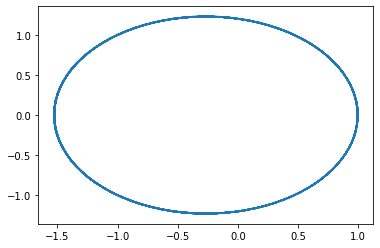

In [4]:
plt.plot(sol.y[0], sol.y[1])
plt.show()

As we can see in the plot. This is a stable orbit. We can not see that this plot is for several periods, because the answer is the same for every period and the graph is put on top of each other.

## Task 3

Kepler's first law:
$$\textit{The orbit of every planet is an ellipse with the Sun at one of the two foci}$$
In this task I will show that this is the case for my solution.

I start of by finding r and $\theta$ for all of my $x$ and $y$ values.

I find r by: $$r = \sqrt{x^{2} + y^{2}}$$
And find $\theta$ by: $$\theta = arctan(y/x)$$

I have implemented this by using a for-loop to iterate over each x and y value from the solution in Task 2. In the code I define x and y for each iteration by overwriting them with the next value in the array. Then I use the value to solve r and $\theta$ by using the equations above. The result from the equation do I add to a list. The $\theta$ do I add to $\textit{thetaList}$ and $r$ do I add to $\textit{rList}$.

In [5]:
thetaList = []
rList = []
for i in range(len(sol.y[0])):
    x = sol.y[0][i]
    y = sol.y[1][i]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    thetaList.append(theta)
    rList.append(r)

The next step is to use the $r$ and $\theta$ values to find the best fit for $p$ and $e$. $p$ is the focal parameter and $e$ is the eccentricity. To find the best fit for $p$ and $e$ I use scipy's function $\textit{optimize.curve_fit}$. The $\textit{curve_fit}$ function use non-linear squares to fit a function f, to data. 

The first parameter of $\textit{curve_fit}$ takes in a function. The function's inputs are important here. The first input, must take the independent variable. The other inputs is the parameters we want to fit. We want to find the best fit for $p$ and $e$ by finding $r(\theta)$, That will be solved in my function $\textit{rTheta}$. which performes this equation:
$$r(\theta) = \frac{p}{1 + e*cos(\theta)}$$

The second parameter is the independent variable where the data is measured. In this case that is the array of all theta values.

The last parameter is the dependent data. Which is a list of all $r$ values.

$\textit{optimize.curve_fit}$ does return a few different things, but we are only interested in the first array, which holds our two fitted values. As shown I find $p$ and $e$ as the first and second element in the first array. I print these values and see that $p = 1.21$ and $e = 0.21$.

In [6]:
def rTheta(theta, p, e):
    return p / (1 + e*np.cos(theta))

In [7]:
parameters = optimize.curve_fit(rTheta, thetaList, rList)
p = parameters[0][0]
e = parameters[0][1]
print("The best fit for p:", p, "\nThe best fit for e:", e)

The best fit for p: 1.2099971627173294 
The best fit for e: 0.20999217902900846


In [8]:
rtlist = rTheta(thetaList, p, e)

The ellipse in task 2 should be the same as the ellipse we get by using $r$ and $\theta$. We now get the ellipse by using the radius $r$ and the angle $\theta$, instead of using the coordinates $x$ and $y$ from task 2. 
As you can see below, the ellipse is identical regardless og wheter I use the angle $\theta$ and radius $r$, $r(\theta)$ or the coordinates as shown in task 2.

To create this plot I used my $r$/$r(\theta)$ and $theta$ values and the formulas given in the assignment. so that the x-axis is created by:
$$x = r*cos(\theta)$$
and the y-axis is:
$$y = r*sin(\theta)$$

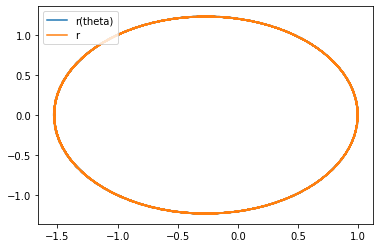

In [9]:
xax = rtlist * np.cos(thetaList)
yax = rtlist * np.sin(thetaList)
plt.plot(xax, yax, label="r(theta)")
xa = rList * np.cos(thetaList)
ya = rList * np.sin(thetaList)
plt.plot(xa, ya, label ="r")
plt.legend(loc="upper left")
plt.show()

We can also compare the results by using a matplotlib's polar. That will draw the polar plot that uses the angle $\theta$ and the distance (radius) $r$. This is just another way of showing the exact same thing as above, but here python scales it for me.

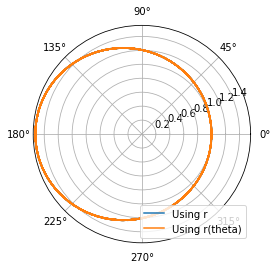

In [10]:
plt.polar(thetaList, rList, label= "Using r")
plt.polar(thetaList, rtlist, label="Using r(theta)")
plt.legend(loc="lower right")
plt.show()

In this task I have shown that the orbit is an ellipse, by using kepler's first law. I used the data from task 2 to find the radius and theta and then get the best fitted $p$ and $e$.

## Task 4

Keplers second law:
$$\textit{A line joining a planet and the Sun sweeps out the equal areas during equal intervals of time.}$$
In this task I will show that my case follows this law.

I have shown that the areal is equal as long as the size of the intervals are equal in two different ways.

The first way is by plotting. So to plot the intervals I calculate:
$$dA = \frac{r^{2}(\theta)}{2}d\theta$$
That is the same as finding the integral between $0$ and $r(\theta)$ with the use of $dr, r$ and $d\theta$. And as we know, finding the definite integral, gives us the areal. 

To find $d\theta$ I use numpy's roll function, which does roll my array by -1. For each roll backwards I substract it with the old theta. 

Then I use $d\theta$ and calculate $dA$. $dA$ is plotted with dots, because every dot indicates the areal in an interval of 1. So as shown on the plot, the dots have almost the same value always, as expected. 

But a few dots are at around -6,5. As you can see, that will happen when a new period starts. That is because we will get a not representative $d\theta$ value, in that point.

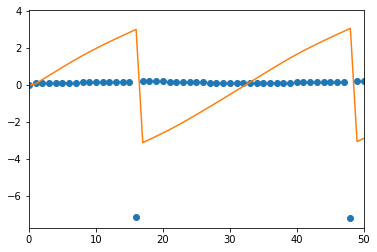

In [11]:
dt = np.roll(thetaList,-1) - thetaList
dA = (((p / (1 + e*np.cos(thetaList)))**2)/2)*dt
plt.xlim(0, 50)
plt.plot(dA, 'o')
plt.plot(thetaList)
plt.show()

The other way we can check that the areal is the same during equal intervals is to calculate it by using scipy's function $\textit{intergrate.quad}$. This is just another way to calculate the definite integral. So I use my function $\textit{calculateDA}$ to calculate the same as above, but not multiplying it with $d\theta$. So it integrates that function and uses the intervals as the lower and upper limits. So areal1 has the lower limit at the $\theta$ value at index 2 and the upper limit at index 4. Areal2 uses index 4 and 6. 
We do also need to say that $p$ and $e$ is arguments in this calculation, because that's not expected from the $\textit{quad}$ function. I use the fitted values from task 3 for $p$ and $e$.

As you can see the values are almost the same for both areas, and I will say that they are close enough.

The problem about this method is that if we use bigger intervals and one of them will use the error values you saw in the plot. The values will be wrong. And without plotting them, it's hard to know that there are some error values. But knowing about that we can see that the first value returned by areal1 and areal2 are very close to each other. The second value is an estimate of the absolute error in the result.

In [12]:
def calculateDA(theta, p, e):
    return ((p / (1 + e*np.cos(theta)))**2) / 2

areal1 = integrate.quad(calculateDA, thetaList[2], thetaList[4], args=(p,e))
print(areal1)

areal2 = integrate.quad(calculateDA, thetaList[4], thetaList[6], args=(p, e))
print(areal2)


(0.2325622323284984, 2.5819594498932387e-15)
(0.25615571707007323, 2.8438997498056254e-15)


Both the methods of showing the areal, gives us the result that the areal are close to the same at during equal intervals, as expected from kepler's second law. 

## Task 5

Kepler's third law:
$$\textit{The ratio of the square of an object's orbital period with the cube of the semi-major axis of its orbit is the same for all objects orbiting the same primary}$$
I will show that this is the case here as well, by finding the ratio of the "planet" I have used in the previous task and check it up agains a new "planet".

To find the period we need to find $a$:
$$a = \frac{p}{(1-e^{2})}$$
And then we can use this a to find the ratio.
$$T^{2}/a^{3}$$
But we still don't know the period T. I have used two different approaches on finding that. 
The first approach is to set the equation above equal to 1. I can do that because all planets have the same ratio or very close, and that ratio is 1.
So I set:
$$T = \sqrt{a^{3}}$$
And as you can see, the period is 1.424

In [13]:
a = p / (1 - e**2)
time = np.sqrt(a**3)
print("The period is", time)

The period is 1.4241495500292591


The next step to find the ratio is just a way to reverse what we just did and get back to the ratio, which should be 1.0 since that is what we set it to be.

In [14]:
ratio = time**2/a**3
print("The ratio is", ratio)

The ratio is 1.0000000000000002


The second approach is to find the period by using what we can see in the plot. I could use the list of theta values. But I chose to use the error values to my advantage, because that's more fun. 

So I created a for loop where it will go through the values from my solution in task 2. And if the derivate dA, which is the dots plotted in task 4 is smaller than -3 it will set the temp value to be the corresponding time. The next time dA is smaller than -3, it will take that time value minus the temp value we got previous. So that means that we have gotten the two error points we have plotted in task 4, and gotten the time between them.

As you can see the time is only 0.02 different from what we got with the first approach.

In [15]:
periodTime = 0
temp = 0
for i in range(len(sol.y[0])):
    if dA[i] < -3:
        if temp > 0:
            periodTime = sol.t[i] - temp
            break
        temp = sol.t[i]
print("The period by using the error values:", periodTime)

The period by using the error values: 1.4438362050929139


By using the second approach and calculating the ratio we get 1.028, which is very close to 1.

In [16]:
ratio2 = periodTime**2/a**3
print("The ratio by using the error values to get the period:",ratio2)

The ratio by using the error values to get the period: 1.0278379806031268


We want to compare the ratio with a another "planet". And to get the new planet I do the same as in task 2, by using $\textit{solve_ivp}$. The difference is in the initial value, that now are {$0.5, 0, 0, 1.1*2\pi/\sqrt{2}$}. I plotted this solution with the solution to task 2, so that we can compare them. As you see, the new orbit is smaller than the previous.

$\textit{Note: Because of lack of creativity, the namesetting on variables related to the new orbit is the similar as the first only with the number 2 after.}$

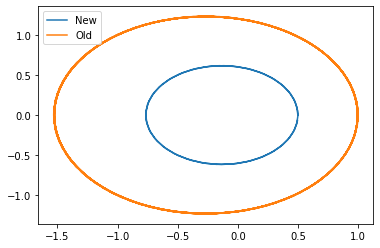

In [17]:
sol2 = integrate.solve_ivp(diffFunc, (0, 1), np.array([0.5,0,0, 1.1 * 2*np.pi*np.sqrt(2)]), method="RK45", rtol  = 1e-10 )
plt.plot(sol2.y[0], sol2.y[1], label='New')
plt.plot(sol.y[0], sol.y[1], label='Old')
plt.legend(loc="upper left")
plt.show()

We want to do the simulation of the new orbit with the same eccentricity, but different radius and therefore different $p$. But first we need all the different values of $\theta$ and $r$. I did this the exact same way as in task 3.

In [18]:
tlist2 = []
rlist2 = []
for i in range(len(sol2.y[0])):
    x2 = sol2.y[0][i]
    y2 = sol2.y[1][i]
    r2 = np.sqrt(x2**2 + y2**2)
    theta2 = np.arctan2(y2, x2)
    tlist2.append(theta2)
    rlist2.append(r2)

Then I optimize the new $p$ value. Since we want to keep the same eccentricity I have taken the eccentricity value from task 3 and use it as a constant instead of an input in the function $\textit{rTheta_e}$. Then I use $\textit{curve_fit}$ in the same way as preious to find the best fitted $p$, which I call p2. As you can see p2 is half of p.

In [19]:
def rTheta_e(theta, p):
    return p / (1 + 0.20997997309449343*np.cos(theta))

parameters2 = optimize.curve_fit(rTheta_e, tlist2, rlist2)
p2 = parameters2[0][0]
print("p from prevous:", p, "\nNew p:",p2)

p from prevous: 1.2099971627173294 
New p: 0.6050049819781923


The next step is to find the definite integral, which gives us the areal, and I do it exactly the same way as preious. As you can see in the plot, we still get the arror when a new period starts.

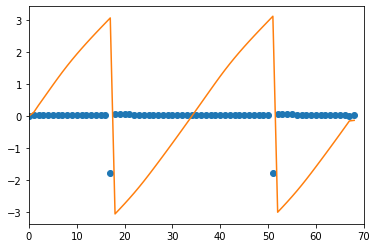

In [20]:
dt2 = np.roll(tlist2,-1) - tlist2
dA2 =(((p2 / (1 + e*np.cos(tlist2)))**2)/2)*dt2

plt.xlim(0, 70)
plt.plot(dA2, 'o')
plt.plot(tlist2)
plt.show()

We want to find and compare the ratio, and as explained previous I can get the period by setting the ratio equal to 1. By doing this the same way as explained above, we get the ratio to be equal 1, and the period is 0.5

In [21]:
a = p2 / (1 - e**2)
time2 = np.sqrt(a**3)
print("Period:", time2)
ratio3 = time2**2/a**3
print("Ratio:", ratio3)

Period: 0.5035208925642207
Ratio: 1.0000000000000002


By using the other method, using the error values in the same way as previous, I get a period of 0.51, and the ratio is therefore set to 1.0253.

In [22]:
periodTime2 = 0
temp2 = 0
for i in range(len(sol2.y[0])):
    if dA2[i] < -1:
        if temp2 > 0:
            periodTime2 = sol2.t[i] - temp2
            break
        temp2 = sol2.t[i]
print("Period:", periodTime2)
ratio4 = periodTime2**2/a**3
print("Ratio:", ratio4)

Period: 0.5098495455178087
Ratio: 1.0252955729602686


Even though the orbit period is smaller and the p is smaller, we still get a ratio equal 1. That proves that the ratio is the same for both of my "planets" orbiting the same primary, as claimed in Kepler's third law. 